In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge datasets to create customer profiles
customer_profiles = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()
customer_profiles = customer_profiles.merge(customers[['CustomerID']], on='CustomerID', how='left')

In [4]:
# Check if the necessary columns are present
print(customer_profiles.columns)

Index(['CustomerID', 'TotalValue', 'Quantity', 'Price'], dtype='object')


In [5]:
# Standardize the numerical features
scaler = StandardScaler()
customer_profiles[['TotalValue', 'Quantity', 'Price']] = scaler.fit_transform(
    customer_profiles[['TotalValue', 'Quantity', 'Price']])


In [7]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_profiles[['TotalValue', 'Quantity', 'Price']])
    sse.append(kmeans.inertia_)

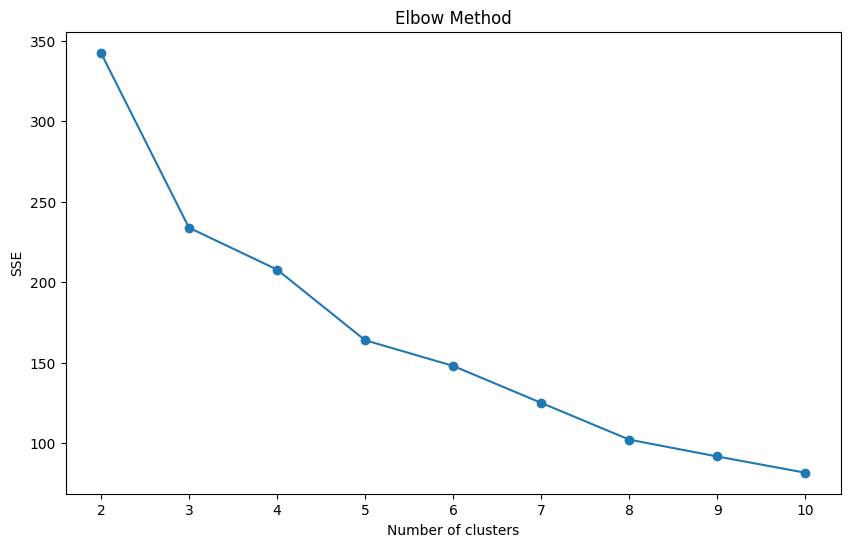

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [9]:
# Perform clustering with the chosen number of clusters
optimal_clusters = 4  # Choose based on the Elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles[['TotalValue', 'Quantity', 'Price']])

In [10]:
# Calculate clustering metrics
db_index = davies_bouldin_score(customer_profiles[['TotalValue', 'Quantity', 'Price']], customer_profiles['Cluster'])
silhouette_avg = silhouette_score(customer_profiles[['TotalValue', 'Quantity', 'Price']], customer_profiles['Cluster'])

In [12]:
#Results :
print(f'Number of clusters: {optimal_clusters}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Number of clusters: 4
Davies-Bouldin Index: 1.12180191226693
Silhouette Score: 0.31097951039547694
